# Representação e manipulação de vídeo
## Aula 17

* Um vídeo digital é uma série de imagens mostradas em sucessão;
* Pode conter áudio em conjunto com as imagens;
* Pode ser comprimido ou descomprimido;

## Definições

* Cada imagem dentro de um vídeo é chamado de **quadro** (inglês: *frame*);
* A quantidade de **quadros por segundo** (**FPS**, inglês: *frames per second*) nos indica quantas imagens são exibidas em um intervalo de um segundo;
* A quantidade de **bits por pixel** (**BPP**, inglês: *bits per pixel*), assim como nas imagens, indica quantos bits são usados para representar cada imagem;
* A **taxa de bits** (inglês: *bit rate*) ou **taxa de dados** (inglês: *data rate*) é uma medida da **qualidade** do vídeo e representa o tamanho do vídeo por segundo.

Para vídeos sem compressão, a taxa de bits pode ser calculada com:

$$d_r = c_d \cdot h \cdot w \cdot r_r$$

Na qual:
* $d_r$: taxa de dados (em bits por segundo);
* $c_d$: profundidade de cores;
* $h$: altura dos quadros;
* $w$: largura dos quadros;
* $r_r$: taxa de atualização (fps).

## Representação de um vídeo

* Normalmente, contém um fluxo (inglês: *stream*) de imagens e outro de áudio;
* As imagens são representadas como uma matriz QxAxLxP, na qual:
    * Q: quantidade de quadros;
    * A: altura dos quadros;
    * L: largura dos quadros;
    * P: profundidade (canais de cores) dos quadros.
* O áudio é representados como uma matriz MxN, na qual
    * M: número de amostras;
    * N: número de canais.
* Em realidade, um vídeo sem compressão pode usar muita memória;
* Sendo assim, é mais comum carregar apenas partes do vídeo a medida que são necessárias.

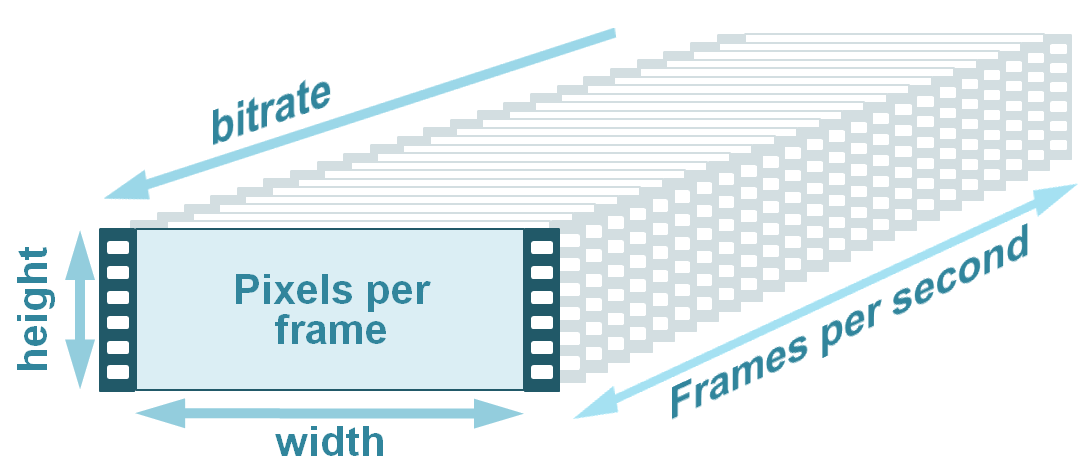

## Vídeo digital com Python

Para manipulação de vídeo, utilizaremos a biblioteca [moviepy](https://pypi.org/project/moviepy), que pode ser instalada através do comando `pip install moviepy` no prompt de comando ou Anaconda Prompt (obs.: isto não funciona para o Jupyter online).

In [2]:
import moviepy.editor as mpe

In [3]:
!pip freeze

aiomqtt==0.1.3
altgraph==0.17.3
anyio==3.6.2
appdirs==1.4.4
apturl==0.5.2
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asttokens==2.2.1
async-lru==2.0.4
asyncio-mqtt==0.16.2
attrs==23.1.0
AWSIoTPythonSDK==1.5.2
Babel==2.12.1
backcall==0.2.0
bcrypt==3.2.0
beautifulsoup4==4.12.2
beniget==0.4.1
bleach==6.0.0
blinker==1.4
boto3==1.26.141
botocore==1.29.141
Brlapi==0.8.3
Brotli==1.0.9
certifi==2020.6.20
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
cliapp==1.20180812.1
click==8.0.3
cmdtest==0.32+git
colorama==0.4.4
comm==0.1.4
command-not-found==0.3
crypto==1.4.1
cryptography==3.4.8
cupshelpers==1.0
customtkinter==5.2.0
cycler==0.11.0
darkdetect==0.8.0
dbus-python==1.2.18
debugpy==1.6.7.post1
decorator==4.4.2
defer==1.0.6
defusedxml==0.7.1
distlib==0.3.6
distro==1.7.0
distro-info==1.1+ubuntu0.1
dnspython==2.1.0
docker==5.0.3
docker-compose==1.29.2
dockerpty==0.4.1
docopt==0.6.2
duplicity==0.8.21
entrypoints==0.4
executing==1.2.0
fastapi==0.95.1
fasteners==0.14.1
fas

Também utilizaremos o nosso já conhecido `numpy` para manipular arrays:

In [4]:
import numpy as np

Podemos carregar um vídeo utilizando o `VideoFileClip`:

In [5]:
video = mpe.VideoFileClip("bigbuckbunny.mp4")

In [6]:
video.ipython_display(width=480)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



TypeError: must be real number, not NoneType

Podemos extrair informação acerca do vídeo com os seguintes métodos:

In [ ]:
print('Tamanho:', video.size) ## ou video.h e video.w
print('FPS:', video.fps)
print('Duração:', video.duration, 'segundos')
print('Número de frames:', video.reader.nframes)

Para carregarmos um frame específico, podemos utilizar do método `get_frame(t)` no tempo `t` (em segundos), o que nos retorna uma imagem RGB em um array do NumPy:

In [ ]:
# Frame em t=5s
print(video.get_frame(5).shape) # quadro contém imagem RGB com resolução 720x1280
print(video.get_frame(5).dtype)

In [ ]:
import matplotlib.pyplot as plt
img = video.get_frame(5)
plt.imshow(img)

Alternativamente, para pegar um frame por índice:

In [ ]:
# índice 10
plt.imshow(video.get_frame(50 / video.fps))

Para o vídeo acima, podemos calcular a taxa de dados:

In [ ]:
l, c, p = video.get_frame(0).shape
print('Taxa de dados:', (p * 8) * l * c * video.fps, 'bps') # uint8

Adicionalmente, o atributo `audio` pode ser utilizado para extrair o áudio do vídeo:

In [ ]:
a = video.audio

In [ ]:
print('Taxa de amostragem:', a.fps, 'Hz')

In [ ]:
print(a.get_frame(5).shape) # 2 canais
print(a.get_frame(5).dtype) # ponto flutuante de 64 bits

## Manipulação de vídeo

Em teoria, poderíamos manipular um vídeo com o NumPy da mesma forma que fazemos com um áudio. Como não carregamos o vídeo por completo na memória, utilizaremos as funções do `moviepy` para manipulá-lo.

Uma forma de iterar pelo vídeo é utilizando o método `iter_frames`.

Como um vídeo sem compressão são dois arrays, um de imagem e outro de áudio, podemos fazer operações conforme estamos habituados. Um exemplo calculando o frame médio da imagem:

In [ ]:
sum_frames = np.zeros(shape=(video.h, video.w, 3), dtype=np.float32) # float32 para evitar overflow
num_frames = video.reader.nframes

for frame in video.iter_frames():
    sum_frames = sum_frames + frame

avg_frames = (sum_frames / num_frames).astype(np.uint8)

plt.imshow(avg_frames)

Para extrair um trecho:

In [ ]:
part = video.subclip(3, 5) # 3 a 5 segundos
part.ipython_display(width=480)

Para modificarmos um determinado frame, utilizamos o `fl_image(func)`:

In [ ]:
def invert(frame):
    return (255-frame)

video_inverted = video1.fl_image(invert)

In [ ]:
video_inverted.ipython_display(width=480)

Para salvar, utilizamos o método `write_videofile(nome_arquivo)`:

In [ ]:
video_inverted.write_videofile('video_inverted.mp4')

Caso queiramos juntar trechos de vídeos, podemos usar o `concatenate_videoclips`:

In [ ]:
part_1 = video.subclip(0, 3)
part_2 = video.subclip(3, 4).fl_image(invert)
part_3 = video.subclip(4) # 4 segundos até o fim

In [ ]:
parts = mpe.concatenate_videoclips([part_1, part_2, part_3])
parts.write_videofile('video_parts.mp4')
parts.ipython_display(width=480)

### Manipulação de áudio

O áudio pode ser manipulado de forma semelhante ao vídeo. Uma forma é utilizando o método `fl(func)`. [Documentação](https://zulko.github.io/moviepy/ref/VideoClip/VideoClip.html#moviepy.video.VideoClip.VideoClip.fl).

A função `func` irá receber uma função equivalente ao `get_frame` e o tempo.

Como exemplo, um código que gradativamente aumenta o volume:

In [ ]:
def increase(audio, t):
    frame = audio(t)
    frame[:, 0] *= t / video.duration
    frame[:, 1] *= t / video.duration
    
    return frame

audio_increase = video.audio.fl(increase)
video_audio_increase = video.set_audio(audio_increase)

In [ ]:
video_audio_increase.write_videofile('video_audio.mp4')

# Exercício

1. Realize uma detecção de bordas (aula 10) em um vídeo com o método de sua escolha e salve o resultado no disco.

Dica:
* O vídeo contém imagens em RGB, e consequentemente, a saída da função deve ser em RGB. Uma solução seria criar um array RGB e atribuir o resultado da deteção de bordas nos três canais.

In [ ]:
import moviepy.editor as mpe
import numpy as np

video = mpe.VideoFileClip("bigbuckbunny.mp4")

In [ ]:
def border_detect(frame):
    gray = np.average(frame, axis=2).astype(np.float64)
    
    abs_tg_c = np.abs(np.diff(gray, axis=0, append=255))
    abs_tg_l = np.abs(np.diff(gray, axis=1, append=255))
    abs_tg = np.hypot(abs_tg_c, abs_tg_l)
    
    l, c, p = frame.shape
    
    border = np.zeros(shape=(l, c), dtype=np.uint8)
    border[abs_tg > 15] = 255
    
    new_frame = np.zeros(shape=(l, c, p), dtype=np.uint8)
    
    new_frame[:, :, 0] = border
    new_frame[:, :, 1] = border
    new_frame[:, :, 2] = border
    return new_frame

In [ ]:
video_borders = video.fl_image(border_detect)
video_borders.write_videofile('video_borders.mp4')

# Referências
* https://zulko.github.io/moviepy/ref/VideoClip/VideoClip.html
* https://en.wikipedia.org/wiki/Digital_video
* https://dusil.com/tag/video-compression-quality/
* https://en.wikipedia.org/wiki/Uncompressed_video
* https://streaminglearningcenter.com/articles/streaming-101-the-basics-codecs-bandwidth-data-rate-and-resolution.html

Aula remota, conforme Port. 345/2020 – MEC